# Assignment 2 - Question 1
The objective of this assignment is to get you familiarize with  the  problem  of  `Clustering`.

## Instructions
- Write your code and analysis in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of other cells.
- No inbuilt functions to be used until specified

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>_Assignment2_Q1.ipynb`.

In [1]:
import nltk
nltk.download('punkt')
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import time
import math
import pickle
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score as ss
from scipy.cluster.hierarchy import dendrogram


[nltk_data] Downloading package punkt to /home/archit/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# !pip3 install sentence-transformers
from sentence_transformers import SentenceTransformer


2022-02-17 11:54:34.792302: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-17 11:54:34.792476: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Dataset



*   Try to explore the dataset and first understand
*   Steps while processing the dataset:

1.   Load the dataset
>> The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test. Here, we only use train part of the dataset as we don't need any training.

2.   pre-processing of the dataset
>>   A set of basic pre-processing steps are given below, if you can do it better, it is appreciable
3.   Trying to obtain the embeddings for the text. 
>> Here, we used bert model to obtain the embeddings, if you want to use anyother sentence/word embeddings (ELMo,universal sentence encoder, or other bert models) you can use it, but not mandatorily change it)

PS: You need not completely understand how bert works. If you are interested, few links will be mentioned below.

In [3]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

# print(list(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

# print(list(newsgroups_train.target_names))

In [4]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [5]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):
  text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_punct(remove_urls(sentence))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", '')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [6]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)
  if len(sentence_embeddings) > 0:
    review_embedding = np.divide(review_embedding, len(sentence_embeddings))
  return review_embedding




In [7]:
X=np.array(pickle.load(open('full_nor.pkl','rb')))
pca=pickle.load(open('pca_2d.pkl','rb'))

In [8]:
# data visualization 

# Try to visualise the points from all the domains and try to visualise them 
# hint: you can use PCA 

import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import random
import numpy as np


# K_Means Algorithm


In [9]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=4).fit(X)
a=kmeans.labels_


#### My inbuilt but not used

In [10]:
def random_unique_k_centroid(x,k):
    n=x.shape[0]
    idx=set()
    while len(idx)<k:
        idx.add(np.random.randint(0,n))
    return x[list(idx)]

def dis_euclidean(x,y):
    val=0.0
    for i in range(len(x)):
        val+=(x[i]-y[i])**2
    return math.sqrt(val)

def dis_from_all_centroid(x,centroids):
    val=[]
    for i in range(len(centroids)):
        val.append(dis_euclidean(x,centroids[i]))
    return val

def form_clusters(x,centroids):
    k=len(centroids)
    clusters={}
    for i in range(k):
        clusters[i]=[]
    for i in range(len(x)):
        dis=dis_from_all_centroid(x[i],centroids)
        idx=np.argmin(dis)
        clusters[idx].append(x[i])
    return clusters

In [11]:
k=2
seeds=random_unique_k_centroid(np.array(X),k)
clusters = form_clusters(X,seeds)

#### Using kmeans

In [12]:
def visualisation(k,X,pca,vis=True):
    kmeans = KMeans(n_clusters=k, random_state=4).fit(X)
    a=kmeans.labels_
    interia=kmeans.inertia_
    dic={}
    for i in range(len(a)):
        if a[i] not in dic:
            dic[a[i]]=[]
        dic[a[i]].append(pca[i])
    if vis==True:
        for i in dic:
            x=np.array(dic[i]).T
            plt.scatter(x[0],x[1])
        plt.title("Kmeans Visualisation using PCA k="+str(k))
        plt.show()
    return a,interia

##### Plots

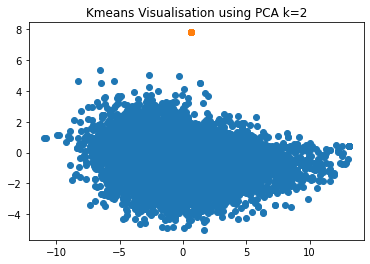

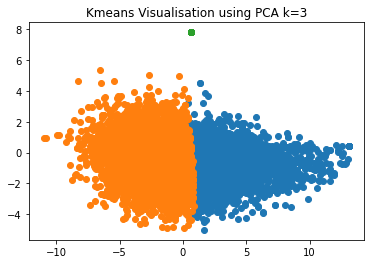

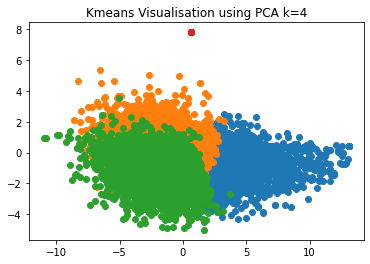

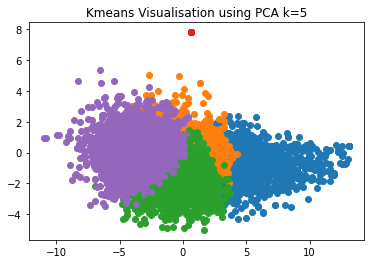

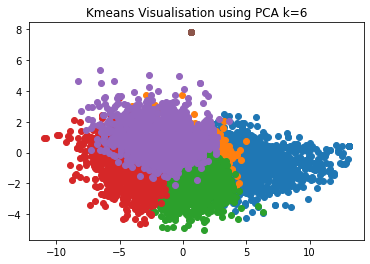

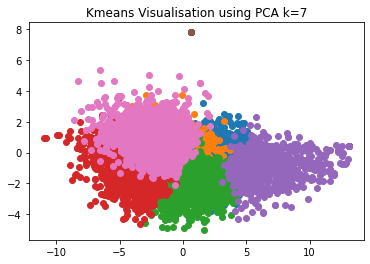

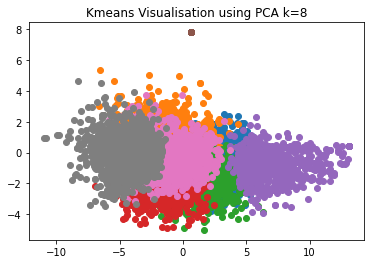

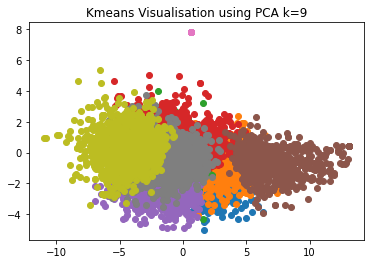

In [13]:
for i in range(2,10):
    visualisation(i,X,pca)

# Elbow method



*   Try to understand how elbow method works
*   Plot the graph between average distance and the number of clusters
*   Use elbow method to find the optimal number of clusters, 







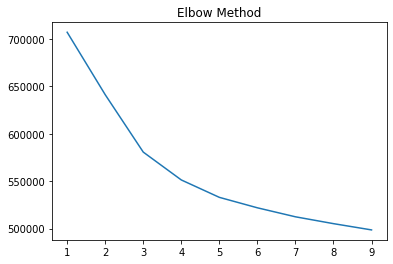

In [18]:
def elbow_method():
    inertia=[]
    for i in range(1,10):
        _,b=visualisation(i,X,pca,False)
        inertia.append(b)
    plt.plot(range(1,10),inertia)
    plt.title("Elbow Method")
    plt.show()

elbow_method()

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




In [ ]:
kmeans = KMeans(n_clusters=1, random_state=4).fit(X)
a=kmeans.labels_
ss(X,a,metric='euclidean',sample_size=1000,random_state=4)

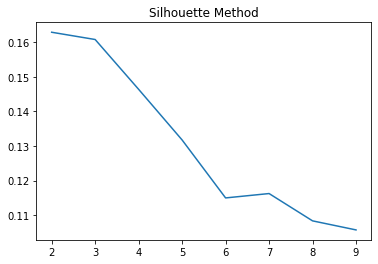

In [28]:
def silhouette_score():
    sil=[]
    for i in range(2,10):
        a,_=visualisation(i,X,pca,False)
        sil.append(ss(X,a,metric='euclidean',sample_size=1000,random_state=4))
    plt.plot(range(2,10),sil)
    plt.title("Silhouette Method")
    plt.show()

silhouette_score()

# Agglomerative clustering

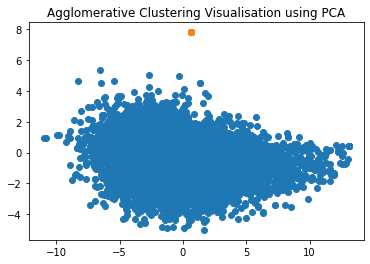

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
# code to write your Kmeans algorithm
#implement your KMeans algorithm here, and visualise the clusters obtained 

from sklearn.cluster import AgglomerativeClustering

def visual_AgglomerativeClustering():
    clustering = AgglomerativeClustering().fit(X)
    a=clustering.labels_
    dic={}
    for i in range(len(a)):
        if a[i] not in dic:
            dic[a[i]]=[]
        dic[a[i]].append(pca[i])
    for i in dic:
        x=np.array(dic[i]).T
        plt.scatter(x[0],x[1])
    plt.title("Agglomerative Clustering Visualisation using PCA")
    plt.show()
    return a

visual_AgglomerativeClustering()

# Dendogram


*   Try to understand the difference between agglomerative clustering and hierarchical clustering
*   Plot dendograms for both kinds of clustering
*   Find the optimal number of clusters with the help of Dendogram



In [15]:
def plot_dendrogram(model,p=5):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix,truncate_mode='level',p=p)




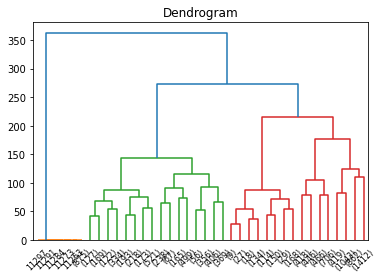

In [17]:
# code to write dendogram
def denogram_AgglomerativeClustering(p=5):
    clustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)
    plt.title("Dendrogram")
    plot_dendrogram(clustering,p)
    plt.show()

denogram_AgglomerativeClustering()

The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity

# useful links to understand BERT

*  https://towardsdatascience.com/bert-explained-state-of-the-art-language-model-for-nlp-f8b21a9b6270#:~:text=How%20BERT%20works,%2Dwords)%20in%20a%20text.&text=As%20opposed%20to%20directional%20models,sequence%20of%20words%20at%20once.


